I0 shape (500, 600), type int64, max 323


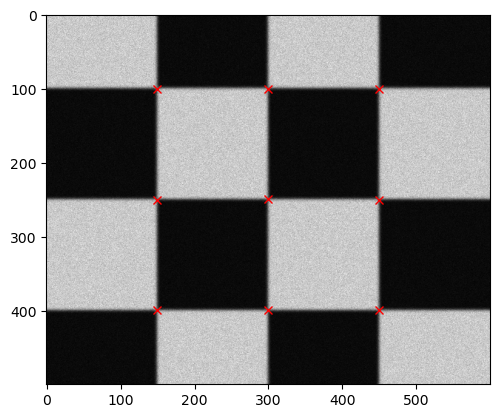

In [1]:
import numpy as np
import opticiq as iq
from opticiq import data
from matplotlib import pyplot as plt

# get a checkerboard, having some camera sim (blur, noise)
I0 = data.demoS.cb
# show the checkerboard we start with
plt.imshow(I0, cmap='gray')
# run cb recipe -->
# imG (a set of gradients used), roi (Regions of interest), peaks (in this case peaks of a saddle function)
imG, roi, peaks = iq.recipe_checkerboard2(I0, 6, threshold=0.3)
print('I0 shape %s, type %s, max %d' % (I0.shape, I0.dtype, I0.max()))
# this plot will show centroids of the peaks noted before, which are unsorted checkerboard points
plt.plot(peaks['cx'], peaks['cy'], 'rx')

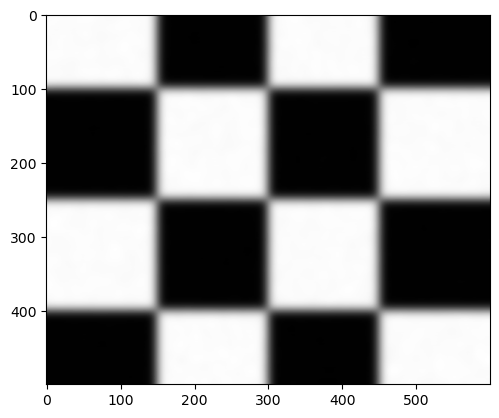

In [2]:
# show the blurred version, note that noise is reduced and gradient zones increased
plt.imshow(imG['I1'], cmap='gray')

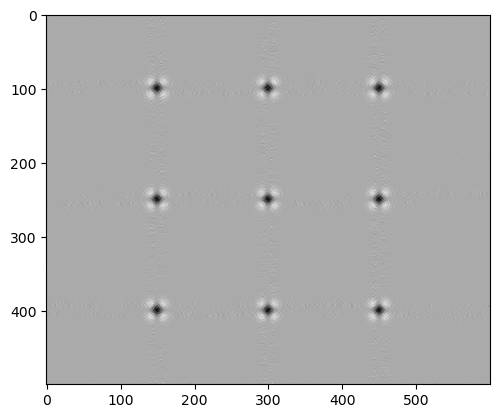

In [3]:
# show Determinant of Hessian Matrix of blurred image
plt.imshow(imG['D_hessian'], cmap='gray')

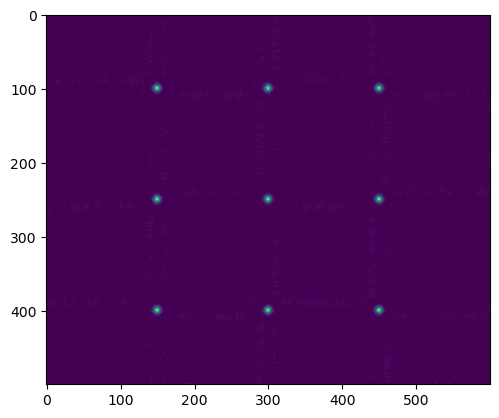

In [4]:
# the saddle function combines the Hessian determinant with minimizing curvature
# on this dataset it doesn't look much different from -D_hessian
# but this saddle function will (usually) reject corners that aren't saddle-points
plt.imshow(imG['f_saddle'])

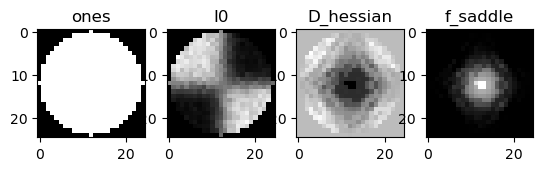

In [5]:
roi.plot_k(0, imG, keys=['ones', 'I0', 'D_hessian', 'f_saddle'])

TODO
----
* Grid intelligence